In [8]:
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [9]:
import glob
import os

# Caminho da pasta
folder_path = "24-09-2025"  # Certifique-se de colocar o caminho correto
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))

# Ler o conteúdo do arquivo
content = []
for file in txt_files:
    with open(file, "r") as f:
        content.extend(f.readlines())

In [10]:

# Filtrar apenas as linhas com ID:5 e que contenham queue_size ou avg_queue
queue_size_data = []
avg_queue_data = []

for line in content:
    if "ID:5" in line:
        # Capturar queue_size
        queue_match = re.search(r"queue_size: (\d+)", line)
        if queue_match:
            time_match = re.search(r"(\d+:\d+\.\d+)", line)
            if time_match:
                queue_size_data.append((time_match.group(1), int(queue_match.group(1))))
        
        # Capturar avg_queue
        avg_match = re.search(r"avg_queue: ([\d\.]+)", line)
        if avg_match:
            time_match = re.search(r"(\d+:\d+\.\d+)", line)
            if time_match:
                avg_queue_data.append((time_match.group(1), float(avg_match.group(1))))

# Converter tempo para formato numérico
def convert_time(time_str):
    return datetime.strptime(time_str, "%M:%S.%f")

# Separar tempos e valores
times_queue = [convert_time(t) for t, _ in queue_size_data]
values_queue = [v for _, v in queue_size_data]

times_avg = [convert_time(t) for t, _ in avg_queue_data]
values_avg = [v for _, v in avg_queue_data]


In [11]:
values_queue = [0 if v == 1 else v for v in values_queue]

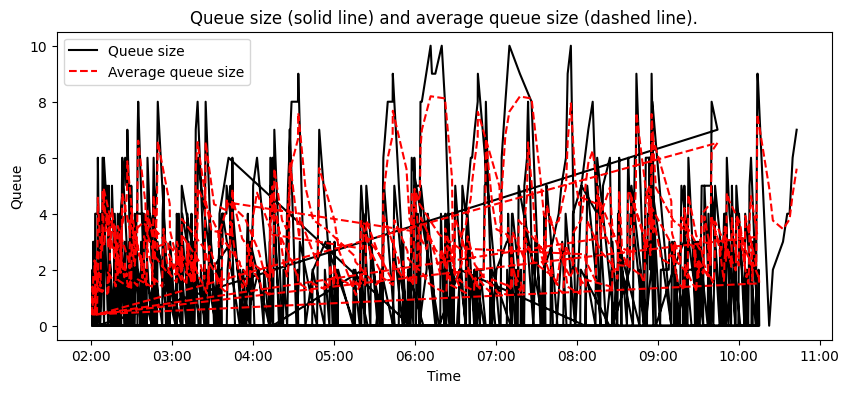

In [12]:
# Criar o gráfico
plt.figure(figsize=(10, 4))
plt.plot(times_queue, values_queue, label="Queue size", linestyle='-', color='black')
plt.plot(times_avg, values_avg, label="Average queue size", linestyle='dashed', color='red')

# Configurar formato do eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Adicionar rótulos e legenda
plt.xlabel("Time")
plt.ylabel("Queue")
plt.legend()
plt.title("Queue size (solid line) and average queue size (dashed line).")

# Mostrar o gráfico
plt.show()

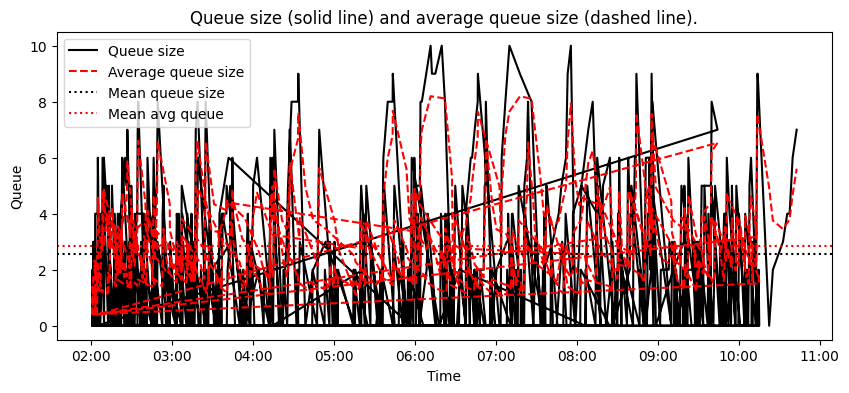

In [13]:
# Criar o gráfico
plt.figure(figsize=(10, 4))
plt.plot(times_queue, values_queue, label="Queue size", linestyle='-', color='black')
plt.plot(times_avg, values_avg, label="Average queue size", linestyle='dashed', color='red')

# Linhas de média
mean_queue = sum(values_queue) / len(values_queue) if values_queue else 0
mean_avg = sum(values_avg) / len(values_avg) if values_avg else 0
plt.axhline(mean_queue, color='black', linestyle=':', label='Mean queue size')
plt.axhline(mean_avg, color='red', linestyle=':', label='Mean avg queue')

# Configurar formato do eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Adicionar rótulos e legenda
plt.xlabel("Time")
plt.ylabel("Queue")
plt.legend()
plt.title("Queue size (solid line) and average queue size (dashed line).")

# Mostrar o gráfico
plt.show()

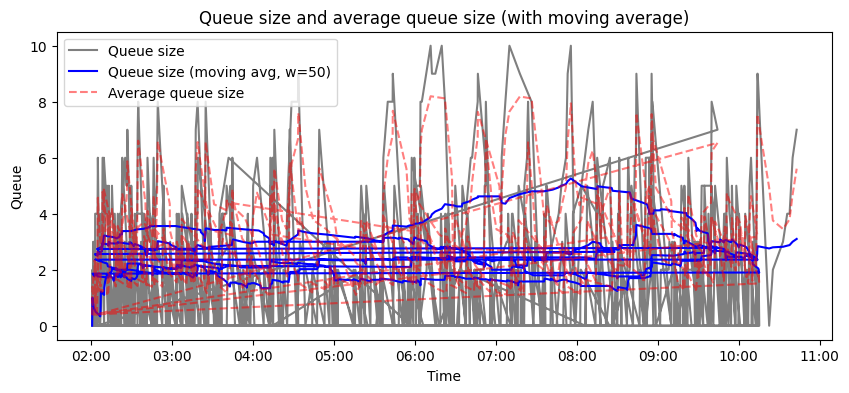

In [14]:
# Adicione esta função no início do notebook
def moving_average(data, window_size=10):
    if len(data) < window_size:
        return data  # Não suaviza se poucos pontos
    return [sum(data[max(0, i-window_size+1):i+1]) / (i - max(0, i-window_size+1) + 1) for i in range(len(data))]

# Calcule a média móvel
window = 50  # Ajuste conforme desejar
queue_ma = moving_average(values_queue, window)

# No seu gráfico:
plt.figure(figsize=(10, 4))
plt.plot(times_queue, values_queue, label="Queue size", linestyle='-', color='black', alpha=0.5)
plt.plot(times_queue, queue_ma, label=f"Queue size (moving avg, w={window})", color='blue')
plt.plot(times_avg, values_avg, label="Average queue size", linestyle='dashed', color='red', alpha=0.5)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xlabel("Time")
plt.ylabel("Queue")
plt.legend()
plt.title("Queue size and average queue size (with moving average)")
plt.show()

Gerar várias médias variando a seed (em torno de 30 rodadas de simualações)
Verificar como gerar de forma automatizada
Gerar relevância estatística
Registrar cada implementação feita


https://matplotlib.org/stable/plot_types/basic/fill_between.html#sphx-glr-plot-types-basic-fill-between-py